# Coursera Capstone Project

This Jupyter Notebook was created for the Coursera Capstone Project for the Data Science Professional Certification.

## Introduction
### Location recommendation for an Asian Restaurants in the Charleston (South Carolina) Area

For this project, I had the idea to do some analysis in regards to the presence of what Asian Restaurants in Charleston, SC Area.

My wife and I really enjoy asian cuisine, but we usually have a hard time finding a really good Asian restaurant close to our area. <br> Finding an Asian restaurant gets even more difficult, when we want to narrow down to a specific kind of Asian cuisine, i.e. Korean food.

As one might know, Charleston Areas are fairly big and sometimes we need to drive a fairly amount of miles to our favorites restaurants. <br> Therefore, I had the idea of creating this project (which is also similar to one of the ideas suggested in the instructions):

#### "Which Charleston Area/Location would it be recommended to open an Asian Restaurant?"

My object with this report is to provide information in regards the Asian Restaurant presence in the Charleston Area. <br> By the end of this report I will provide enough insight for someone who is researching for a location to open an Asian Restaurant in the area

**Note:** <br>
*For the scope of this project, I will narrow down to East (Chinese, Japanese, Korean, ...) and Southeast (Thai, Vietnamese, Filipino,...) cuisines. <br>
*Kind reminder that Asian cuisine can also be South Asian (Indian, Pakistani, Bangladeshi, ...), West Asian (Arab, Turkish, Mesopotamian, ...) and other regions, but this is not the focuse for this analysis.

## Data

A) In order to identify all Charleston Areas, I will be using the *charleston.com* web site as a reference of all Areas located in Charleston (https://www.charleston.com/areas). The "Areas", in this case, could represent a city, a town or even a neighborhood.

B) Once the Areas are identified, I will be using the *geopy.geocoders* in order to find the main coordinate (latitude and longitude) of each area.

C) Later, I will use the Foursquare API to extract Food Venues around each Area.

D) Finally, an analysis will be made with all the food locations with the objective of answering the above question.

#### A) Charleston areas

As mentioned above, we will use the web site https://www.charleston.com/areas as a reference for the Charleston Areas.

In [1]:
# import relevant modules and functions
import pandas as pd
import numpy as np
import requests  # this module helps us to download a web page

from bs4 import BeautifulSoup # this module helps in web scrapping

In [2]:
#The below url contains a list of Charleston Areas
url = "https://www.charleston.com/areas"

In [3]:
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

In [4]:
soup = BeautifulSoup(data,"html5lib")

By openining the website and *inspecting each element*, it is possible to identify in which *section* the Charleston Areas are listed

In [5]:
section=soup.find('section', {'id':'tm-top-d'})

Once the *section* is located, we can iterate throuh all *a* elements and create a list of all areas.

In [6]:
charleston_areas = []
for row in section.findAll('a', {'class':'uk-link-reset'}):
    text=row.text
    charleston_areas.append(text)

The list will then be added to the dataframe *df_chs*

In [7]:
df_chs = pd.DataFrame(columns={'Areas'})

In [8]:
df_chs['Areas'] = charleston_areas

In [9]:
df_chs

Areas
0               Awendaw
1         Daniel Island
2   Downtown Charleston
3          Edisto Beach
4           Folly Beach
5           Goose Creek
6               Hanahan
7             Hollywood
8         Isle of Palms
9          James Island
10         Johns Island
11        Kiawah Island
12               Ladson
13       McClellanville
14       Mount Pleasant
15        Moncks Corner
16     North Charleston
17              Ravenel
18      Seabrook Island
19    Sullivan’s Island
20          Summerville
21      Wadmalaw Island
22           Walterboro
23          West Ashley

We can conclude that Charleston have 24 different Areas.

#### B) Coordinates

Now that we have all Charleston Areas, we will identify the *Coordinates* (Latitude and Longitude) for each location

In [10]:
# import relevant libraries
from geopy.geocoders import Nominatim

In [11]:
# instantiate a new Nominatim client
geolocator = Nominatim(user_agent="foursquare_agent")

In [12]:
# iterate through each area, identify the latitude and longitude and attribute to the dataframe
df_chs['Latitude'] = ""
df_chs['Longitude'] = ""

for area in df_chs['Areas']:
    location = geolocator.geocode('{}, SC'.format(area))
    latitude = location.latitude
    longitude = location.longitude
    df_chs.loc[df_chs['Areas']==area,'Latitude'] = latitude
    df_chs.loc[df_chs['Areas']==area,'Longitude'] = longitude

In [13]:
df_chs

Areas Latitude Longitude
0               Awendaw  33.0377  -79.6131
1         Daniel Island  32.8591   -79.912
2   Downtown Charleston  32.7778  -79.9659
3          Edisto Beach  32.4794  -80.3348
4           Folly Beach   32.655  -79.9406
5           Goose Creek  32.9961  -80.0387
6               Hanahan  32.9139  -80.0088
7             Hollywood  32.7343  -80.2418
8         Isle of Palms  32.7868   -79.788
9          James Island  32.7277  -79.9556
10         Johns Island  32.7024  -80.0481
11        Kiawah Island  32.6082  -80.0848
12               Ladson  32.9857  -80.1098
13       McClellanville  33.0882  -79.4612
14       Mount Pleasant  32.7941  -79.8626
15        Moncks Corner   33.196  -80.0131
16     North Charleston  32.9131   -80.063
17              Ravenel  32.7632  -80.2501
18      Seabrook Island  32.5882  -80.1634
19    Sullivan’s Island  32.7702  -79.8313
20          Summerville  33.0187  -80.1763
21      Wadmalaw Island   32.671  -80.2345
22           Walterboro  32.9021  -80.6673
23          West Ashley  32.7741  -79.9485

Now that we have all Charleston Areas and their respective coordinates, we can also try to plot these coordinates in a map.

In [14]:
import folium # map rendering library

In [15]:
# create map for Charleston
latitude = df_chs['Latitude'].mean()
longitude = df_chs['Longitude'].mean()
map_chs = folium.Map(location=[latitude, longitude], zoom_start=9.4)

# add markers to map
for lat, lng, areas in zip(df_chs['Latitude'], df_chs['Longitude'], df_chs['Areas']):
    label = areas
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chs)  

In [16]:
map_chs

On the above map we can identify all the 24 Areas from Charleston.

### C) Foursquare API

The next step is to apply all the identified coordinates into Foursquare API in order to gather Food Venues.

In [17]:
# import relevant libraries
from pandas import json_normalize

In [18]:
#Foursquare info
CLIENT_ID = 'UPGNJBDJQWQODJIXYRWQPKIFQ0KD4D2GVNGOG51M4LBHGQFJ' # your Foursquare ID
CLIENT_SECRET = '0P5R0QSHEWT5NTXWKDMJJJT3JHLU3G5SA5JDTPCBTI0FXLOZ' # your Foursquare Secret
ACCESS_TOKEN = 'TBUVGJARDC051AE2XYBPIWM5FPSVM1BBKL54Q42EG5QT2S5N' # your FourSquare Access Token
VERSION = '20210101'
LIMIT = 500
radius = 25000 # define radius
section = 'food' # restrict search for food

We will create a function which explore each Charleston Area. <br>
The function will create a URL for Foursquare which get Venues under the section *"food"* within a radius of *25,000 meters* (~15 miles).

We will send the GET request and examine the results, which are attributed to the new dataframe *charleston_venues*

In [19]:
# function to create url, extract data with Json and return relevant information
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    offset_list = [0, 10, 20, 30, 40, 50]
    for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
        
        for offset in offset_list:
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&ll={},{}&v={}&section={}&radius={}&offset={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                lat, 
                lng,
                VERSION,
                section,
                radius,
                offset)
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']              

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [20]:
charleston_venues = getNearbyVenues(names=df_chs['Areas'],
                                   latitudes=df_chs['Latitude'],
                                   longitudes=df_chs['Longitude']
                                  )

In [21]:
# remove duplicate entries
charleston_venues = charleston_venues.drop_duplicates().reset_index(drop=True)

### D) Final data collection

With this we complete the data collection.

The next step we will work on some Data Analysis in order to bring some insights of recommended places to open an Asian Restaurant.

In [22]:
charleston_venues

Area  Area Latitude  Area Longitude                      Venue  \
0         Awendaw      33.037670      -79.613127          T.W. Graham & Co.   
1         Awendaw      33.037670      -79.613127         See Wee Restaurant   
2         Awendaw      33.037670      -79.613127                Chick-fil-A   
3         Awendaw      33.037670      -79.613127                 Dog & Duck   
4         Awendaw      33.037670      -79.613127       McClellanville Diner   
...           ...            ...             ...                        ...   
1670  West Ashley      32.774095      -79.948492  The Rooftop Bar at Vendue   
1671  West Ashley      32.774095      -79.948492            Sweetwater Cafe   
1672  West Ashley      32.774095      -79.948492         Hannibal's Kitchen   
1673  West Ashley      32.774095      -79.948492             Circe's Grotto   
1674  West Ashley      32.774095      -79.948492              Home Team BBQ   

      Venue Latitude  Venue Longitude                   Venue Category  
0          33.089738       -79.462382               Seafood Restaurant  
1          32.926631       -79.714680               Seafood Restaurant  
2          32.865660       -79.784136             Fast Food Restaurant  
3          32.873978       -79.778305              American Restaurant  
4          33.088347       -79.486800              American Restaurant  
...              ...              ...                              ...  
1670       32.778590       -79.926620                       Restaurant  
1671       32.780582       -79.932576                   Breakfast Spot  
1672       32.798506       -79.935869  Southern / Soul Food Restaurant  
1673       32.781950       -79.935341                   Sandwich Place  
1674       32.796979       -79.997665                        BBQ Joint  

[1675 rows x 7 columns]

## Methodology and Results

Now that we were able to identify the Food Venue locations in the Charleston Area, the first step that I would like to take is to cluster all the venues and identify the regions with higher density of restaurants. <br>
Depending on the business strategy, a new business owners might want to open a restaurant close to other food locations, which naturally attract a lot of people (reducing on the Marketing cost). On the other hand, some entrepreneurs might prefer locations far away from other restaurants.

In order to create the aforementioned clusters, I will apply the DBSCAN method. <br>
With this method, we will be able to create arbitrary shape clusters and the Density-based clustering is also perfect to locate regions with high density vs. low density.

Once these clusters are identified, we can now segment which clusters have a higher or lower Asians cuisine presence. <br>
For this step, we will work on identifying what is considered "Asian cuisine" and understand which clusters have more or less Asians restaurants.

### DBSCAN

Before applying the DBSCAN methodology, we will first map all Venues that were extracted from the Foursquare API.

In [23]:
# create map for Charleston
latitude = df_chs['Latitude'].mean()
longitude = df_chs['Longitude'].mean()
map_chs2 = folium.Map(location=[latitude, longitude], zoom_start=9.4)
    
# add Venus markers to map
for lat, lng, venue in zip(charleston_venues['Venue Latitude'], charleston_venues['Venue Longitude'], charleston_venues['Venue']):
    label = venue
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='green',
        fill=True,
        fill_color='#5acc31',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chs2)
    
# add Area markers to map
for lat, lng, areas in zip(df_chs['Latitude'], df_chs['Longitude'], df_chs['Areas']):
    label = areas
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chs2)

One can notice on the below map that the code using the Foursquare API was able to identify Food venue locations across all Charleston areas. <br>
In some cases, given the parameters, we were also able to identify locations outside of the Charleston Area (such as Beaufort).

In [24]:
map_chs2

We will now create a list of all venues (regardless of the area)

In [25]:
# filter dataframe with relevant columns
chs_venues = charleston_venues[['Venue', 'Venue Category', 'Venue Latitude', 'Venue Longitude']].drop_duplicates().reset_index(drop=True)

In [26]:
chs_venues

Venue        Venue Category  Venue Latitude  \
0              T.W. Graham & Co.    Seafood Restaurant       33.089738   
1             See Wee Restaurant    Seafood Restaurant       32.926631   
2                    Chick-fil-A  Fast Food Restaurant       32.865660   
3                     Dog & Duck   American Restaurant       32.873978   
4           McClellanville Diner   American Restaurant       33.088347   
..                           ...                   ...             ...   
462  Callie's Hot Little Biscuit        Breakfast Spot       32.780913   
463                  Amen Street    Seafood Restaurant       32.780124   
464    The Rooftop Bar at Vendue            Restaurant       32.778590   
465              Sweetwater Cafe        Breakfast Spot       32.780582   
466               Circe's Grotto        Sandwich Place       32.781950   

     Venue Longitude  
0         -79.462382  
1         -79.714680  
2         -79.784136  
3         -79.778305  
4         -79.486800  
..               ...  
462       -79.929881  
463       -79.927243  
464       -79.926620  
465       -79.932576  
466       -79.935341  

[467 rows x 4 columns]

The Clustering will be based on the venue locations, i.e. Latitude and Longitude.

DBSCAN from sklearn library can runs DBSCAN clustering from vector array or distance matrix. In our case, we pass it the Numpy array Clus_data and Set to find core samples of high density and expands clusters from them.

In [27]:
# import relevant libraries
import os
os.environ['PROJ_LIB'] = r'C:\Users\AKenji\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap

from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [28]:
# set initial map line
llon=-85
ulon=-75
llat=25
ulat=35

# set baseline
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

# convert coordinates to vector array
xs,ys = my_map(np.asarray(chs_venues['Venue Longitude']), np.asarray(chs_venues['Venue Latitude']))
chs_venues['xm']= xs.tolist()
chs_venues['ym'] =ys.tolist()

In [29]:
# create and fit DBSCAN
sklearn.utils.check_random_state(1000)
Clus_dataSet = chs_venues[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
chs_venues["Clus_Db"]=labels

In [30]:
# check how many labels exist
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In total, according to the DBSCAN methodology, we were able to identify 13 different clusters.

Notice that the outliers label is -1.

In [31]:
# check dataframe after Cluster attribution
chs_venues

Venue        Venue Category  Venue Latitude  \
0              T.W. Graham & Co.    Seafood Restaurant       33.089738   
1             See Wee Restaurant    Seafood Restaurant       32.926631   
2                    Chick-fil-A  Fast Food Restaurant       32.865660   
3                     Dog & Duck   American Restaurant       32.873978   
4           McClellanville Diner   American Restaurant       33.088347   
..                           ...                   ...             ...   
462  Callie's Hot Little Biscuit        Breakfast Spot       32.780913   
463                  Amen Street    Seafood Restaurant       32.780124   
464    The Rooftop Bar at Vendue            Restaurant       32.778590   
465              Sweetwater Cafe        Breakfast Spot       32.780582   
466               Circe's Grotto        Sandwich Place       32.781950   

     Venue Longitude             xm            ym  Clus_Db  
0         -79.462382  615754.723565  1.030322e+06       -1  
1         -79.714680  587700.533477  1.008694e+06       -1  
2         -79.784136  579977.364005  1.000620e+06       -1  
3         -79.778305  580625.719078  1.001721e+06       -1  
4         -79.486800  613039.626102  1.030137e+06       -1  
..               ...            ...           ...      ...  
462       -79.929881  563771.210580  9.894064e+05        0  
463       -79.927243  564064.605700  9.893021e+05        0  
464       -79.926620  564133.851298  9.890991e+05        0  
465       -79.932576  563471.597406  9.893626e+05        0  
466       -79.935341  563164.119920  9.895435e+05        0  

[467 rows x 7 columns]

Now, we can visualize the clusters using basemap:

In [32]:
from folium.features import DivIcon
def number_DivIcon(color,number):
    """ Create a 'numbered' icon
    
    """
    icon = DivIcon(
            icon_size=(1,1),
            icon_anchor=(1,1),
            html="""<span class="fa-stack " style="font-size: 2pt" >>
                    <!-- The icon that will wrap the number -->
                    <span class="fa fa-circle-o fa-stack-2x" style="color : {:s}"></span>
                    <!-- a strong element with the custom content, in this case a number -->
                    <strong class="fa-stack-1x">
                         {:02d}  
                    </strong>
                </span>""".format(color,number)
        )
    return icon

In [33]:
# create map for Charleston
latitude = df_chs['Latitude'].mean()
longitude = df_chs['Longitude'].mean()
map_chs3 = folium.Map(location=[latitude, longitude], zoom_start=9.45)

# create 14 different color for cluster differetiation in mapping
color_mark=['#C39BD3', '#A569BD', '#7FB3D5', '#76D7C4', '#45B39D', '#7DCEA0', '#58D68D', '#F7DC6F', '#F5B041 ', '#F0B27A',
       '#DC7633', '#2ECC71', '#E74C3C', 'gray']
    
# add Venus markers to map
for lat, lng, venue, cluster in zip(chs_venues['Venue Latitude'], chs_venues['Venue Longitude'],
                           chs_venues['Venue'], chs_venues['Clus_Db']):
    label = venue
    label = folium.Popup(label, parse_html=True)

    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color=color_mark[cluster],
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(map_chs3)  
    

# add Area markers to map
for lat, lng, areas in zip(df_chs['Latitude'], df_chs['Longitude'], df_chs['Areas']):
    label = areas
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chs3)

cluster_location = chs_venues.groupby('Clus_Db').mean()

for index, row in cluster_location.iterrows():
    if index >= 0:
        lat = row['Venue Latitude']
        lon = row['Venue Longitude']
        folium.Marker(
            [lat, lon],
            icon=DivIcon(
                icon_size=(20,20),
                icon_anchor=(0,0),
                html='<h4><strong><span style="color: #ff0000;">' + str(index) + '</span></strong></h4>',
                )
            ).add_to(map_chs3)

There are some significant number of outliers (marked in gray), but we were still able to identify 13 different clusters (from "0" to "13") <br>

In [34]:
map_chs3

### Areas with higher density of venues

We will now determine which Charleston areas belong to these Clusters.

For this case, we will identify which areas are within each cluster. 

In [35]:
# create new dataframe with only Venus, lat, long and Cluster_Number
chs_cluster=[]
chs_clusters = pd.merge(charleston_venues, chs_venues[['Venue', 'Venue Latitude', 'Venue Longitude', 'Clus_Db']], on=['Venue', 'Venue Latitude', 'Venue Longitude'], how='left')

In [36]:
# remove the Outlier venues
chs_clusters = chs_clusters.loc[chs_clusters['Clus_Db']!=-1]

In [37]:
chs_clusters

Area  Area Latitude  Area Longitude  \
18    Daniel Island      32.859064      -79.912030   
19    Daniel Island      32.859064      -79.912030   
20    Daniel Island      32.859064      -79.912030   
22    Daniel Island      32.859064      -79.912030   
23    Daniel Island      32.859064      -79.912030   
...             ...            ...             ...   
1670    West Ashley      32.774095      -79.948492   
1671    West Ashley      32.774095      -79.948492   
1672    West Ashley      32.774095      -79.948492   
1673    West Ashley      32.774095      -79.948492   
1674    West Ashley      32.774095      -79.948492   

                             Venue  Venue Latitude  Venue Longitude  \
18                       Lewis BBQ       32.808748       -79.946641   
19                   Edmund's Oast       32.810009       -79.947417   
20                   Butcher & Bee       32.810100       -79.947916   
22       Fiery Ron's Home Team BBQ       32.809248       -79.946543   
23    Santi's Restaurante Mexicano       32.812892       -79.950402   
...                            ...             ...              ...   
1670     The Rooftop Bar at Vendue       32.778590       -79.926620   
1671               Sweetwater Cafe       32.780582       -79.932576   
1672            Hannibal's Kitchen       32.798506       -79.935869   
1673                Circe's Grotto       32.781950       -79.935341   
1674                 Home Team BBQ       32.796979       -79.997665   

                       Venue Category  Clus_Db  
18                          BBQ Joint        0  
19                          Gastropub        0  
20           Mediterranean Restaurant        0  
22                          BBQ Joint        0  
23                 Mexican Restaurant        0  
...                               ...      ...  
1670                       Restaurant        0  
1671                   Breakfast Spot        0  
1672  Southern / Soul Food Restaurant        0  
1673                   Sandwich Place        0  
1674                        BBQ Joint        0  

[1411 rows x 8 columns]

In [38]:
# check which areas belongs to each cluster and total cluster within each area
clusters_no = np.arange(0,13,1)
chs_area_clusters = pd.DataFrame(columns=clusters_no)
chs_area_clusters.insert(0, 'Areas', df_chs['Areas'])

for area in chs_area_clusters['Areas']:
    for cluster in clusters_no:
        if chs_clusters[(chs_clusters['Area']==area) & (chs_clusters['Clus_Db']==cluster)].shape[0] > 0:
            in_cluster = int(1)
        else:
            in_cluster = int(0)
        chs_area_clusters.loc[chs_area_clusters['Areas']==area, cluster] = in_cluster

for cluster in clusters_no:
    chs_area_clusters[cluster] = chs_area_clusters[cluster].astype(int)

# add total columns
chs_area_clusters['Total'] =  chs_area_clusters.sum(axis=1).astype(int)
chs_area_clusters.loc[24,1:] =  chs_area_clusters.sum(axis=0)
chs_area_clusters.loc[24,'Areas'] = 'Total'

for cluster in clusters_no:
    chs_area_clusters[cluster] = chs_area_clusters[cluster].astype(int)
chs_area_clusters['Total'] = chs_area_clusters['Total'].astype(int)

In [39]:
chs_area_clusters

Areas   0  1  2  3  4  5  6  7  8  9  10  11  12  Total
0               Awendaw   0  0  0  0  0  0  0  0  0  0   0   0   0      0
1         Daniel Island   1  1  0  0  0  0  0  0  0  0   0   0   0      2
2   Downtown Charleston   1  0  1  0  0  0  0  0  0  0   0   0   0      2
3          Edisto Beach   0  0  0  1  0  0  0  0  0  0   0   0   0      1
4           Folly Beach   1  1  1  0  1  0  0  0  0  0   0   0   0      4
5           Goose Creek   0  0  0  0  0  1  1  1  1  1   0   0   0      5
6               Hanahan   1  0  0  0  0  1  0  1  1  0   1   0   0      5
7             Hollywood   1  0  0  1  0  0  0  1  0  0   1   0   0      4
8         Isle of Palms   1  1  0  0  0  0  0  0  0  0   0   0   0      2
9          James Island   1  0  1  0  1  0  0  0  0  0   0   0   0      3
10         Johns Island   1  0  1  1  1  0  0  0  0  0   1   0   0      5
11        Kiawah Island   1  0  1  1  1  0  0  0  0  0   1   0   0      5
12               Ladson   0  0  0  0  0  1  1  1  1  1   0   0   0      5
13       McClellanville   0  0  0  0  0  0  0  0  0  0   0   0   0      0
14       Mount Pleasant   1  1  0  0  0  0  0  0  0  0   0   0   0      2
15        Moncks Corner   0  0  0  0  0  1  1  0  0  0   0   1   0      3
16     North Charleston   1  0  0  0  0  1  1  1  1  1   1   0   0      7
17              Ravenel   1  0  0  1  0  1  0  1  1  1   1   0   0      7
18      Seabrook Island   0  0  1  1  1  0  0  0  0  0   1   0   0      4
19    Sullivan’s Island   1  1  0  0  0  0  0  0  0  0   0   0   0      2
20          Summerville   0  0  0  0  0  1  1  1  1  1   0   0   0      5
21      Wadmalaw Island   1  0  0  1  0  0  0  0  0  0   1   0   0      3
22           Walterboro   0  0  0  0  0  0  0  0  0  0   0   0   1      1
23          West Ashley   1  0  1  0  0  0  0  0  0  0   0   0   0      2
24                Total  15  5  7  7  5  7  5  7  6  5   8   1   1     79

Based on the above analysis, one can conclude:

1) Some Charleston Areas do not have any cluster (Awendaw and McClellanville). These are areas that have food venues, but not a significant number that would create a cluster.

2) On the other hand, we also have the North Charleston area which is close to 7 different Clusters.

3) Finally, the Cluster Number 0 is the cluster which impacts most areas. This Cluster is mostly composed of restaurants from Downton Charleston. Since this cluster is located "in the center" of Charleston, it is natural to expect that multiple areas will be impacted by this cluster.

### Identifying Asian Restaurants Categories

We will now work on separating and identifying the Venues Categories that belongs to the "Asian Cuisine"

The first step is to create a list of all Food Venue Categories

In [40]:
# create dataframe with all Venue Categories and get all the unique values
food_categories = chs_clusters[['Venue Category']].drop_duplicates().sort_values(by=['Venue Category']).reset_index(drop=True)

In [41]:
food_categories

Venue Category
0               American Restaurant
1                  Asian Restaurant
2                         BBQ Joint
3                        Bagel Shop
4                            Bakery
5                            Bistro
6              Brazilian Restaurant
7                    Breakfast Spot
8                      Burger Joint
9                              Café
10               Chinese Restaurant
11          Comfort Food Restaurant
12                    Deli / Bodega
13                            Diner
14                       Donut Shop
15             Fast Food Restaurant
16                             Food
17                       Food Court
18                       Food Truck
19                French Restaurant
20              Fried Chicken Joint
21                        Gastropub
22                 Greek Restaurant
23                    Hot Dog Joint
24                        Irish Pub
25               Italian Restaurant
26              Japanese Restaurant
27         Mediterranean Restaurant
28               Mexican Restaurant
29        Middle Eastern Restaurant
30          New American Restaurant
31                         Pet Café
32                      Pizza Place
33                       Restaurant
34                      Salad Place
35                   Sandwich Place
36               Seafood Restaurant
37                       Soup Place
38  Southern / Soul Food Restaurant
39               Spanish Restaurant
40                       Steakhouse
41                 Sushi Restaurant
42                       Taco Place
43               Tex-Mex Restaurant
44                  Thai Restaurant
45    Vegetarian / Vegan Restaurant
46            Vietnamese Restaurant
47                      Wings Joint

Based on the above categories we can identify the following categories which most people would consider Asian cuisine (i.e. East Asiand and Southeast Asian):
* Asian Restaurant
* Chinese Restaurant
* Japanese Restaurant
* Sushi Restaurant
* Thai Restaurant
* Vietnamese Restaurant

Therefore, we can also classify the above list between Asian (=1) and Non-Asian (=0)

In [42]:
# list of asian categories
food_categories
asian_venue = ['Asian Restaurant', 'Chinese Restaurant', 'Japanese Restaurant', 'Sushi Restaurant', 'Thai Restaurant', 'Vietnamese Restaurant']

def is_asian (row):
    if row['Venue Category'] in asian_venue:
        return 1
    else:
        return 0

for row in food_categories:
    food_categories['Asian Restaurant'] = food_categories.apply(lambda row: is_asian(row), axis=1)
    
def is_not_asian (row):
    if row['Venue Category'] in asian_venue:
        return 0
    else:
        return 1

# apply function for each row
for row in food_categories:
    food_categories['Non-Asian Restaurant'] = food_categories.apply(lambda row: is_not_asian(row), axis=1)

In [43]:
food_categories

Venue Category  Asian Restaurant  Non-Asian Restaurant
0               American Restaurant                 0                     1
1                  Asian Restaurant                 1                     0
2                         BBQ Joint                 0                     1
3                        Bagel Shop                 0                     1
4                            Bakery                 0                     1
5                            Bistro                 0                     1
6              Brazilian Restaurant                 0                     1
7                    Breakfast Spot                 0                     1
8                      Burger Joint                 0                     1
9                              Café                 0                     1
10               Chinese Restaurant                 1                     0
11          Comfort Food Restaurant                 0                     1
12                    Deli / Bodega                 0                     1
13                            Diner                 0                     1
14                       Donut Shop                 0                     1
15             Fast Food Restaurant                 0                     1
16                             Food                 0                     1
17                       Food Court                 0                     1
18                       Food Truck                 0                     1
19                French Restaurant                 0                     1
20              Fried Chicken Joint                 0                     1
21                        Gastropub                 0                     1
22                 Greek Restaurant                 0                     1
23                    Hot Dog Joint                 0                     1
24                        Irish Pub                 0                     1
25               Italian Restaurant                 0                     1
26              Japanese Restaurant                 1                     0
27         Mediterranean Restaurant                 0                     1
28               Mexican Restaurant                 0                     1
29        Middle Eastern Restaurant                 0                     1
30          New American Restaurant                 0                     1
31                         Pet Café                 0                     1
32                      Pizza Place                 0                     1
33                       Restaurant                 0                     1
34                      Salad Place                 0                     1
35                   Sandwich Place                 0                     1
36               Seafood Restaurant                 0                     1
37                       Soup Place                 0                     1
38  Southern / Soul Food Restaurant                 0                     1
39               Spanish Restaurant                 0                     1
40                       Steakhouse                 0                     1
41                 Sushi Restaurant                 1                     0
42                       Taco Place                 0                     1
43               Tex-Mex Restaurant                 0                     1
44                  Thai Restaurant                 1                     0
45    Vegetarian / Vegan Restaurant                 0                     1
46            Vietnamese Restaurant                 1                     0
47                      Wings Joint                 0                     1

We can now attribute the above classification to our dataframe with all venues.

In [44]:
chs_venues = pd.merge(chs_venues, food_categories, on=['Venue Category'], how='left')

In [45]:
chs_venues

Venue        Venue Category  Venue Latitude  \
0              T.W. Graham & Co.    Seafood Restaurant       33.089738   
1             See Wee Restaurant    Seafood Restaurant       32.926631   
2                    Chick-fil-A  Fast Food Restaurant       32.865660   
3                     Dog & Duck   American Restaurant       32.873978   
4           McClellanville Diner   American Restaurant       33.088347   
..                           ...                   ...             ...   
462  Callie's Hot Little Biscuit        Breakfast Spot       32.780913   
463                  Amen Street    Seafood Restaurant       32.780124   
464    The Rooftop Bar at Vendue            Restaurant       32.778590   
465              Sweetwater Cafe        Breakfast Spot       32.780582   
466               Circe's Grotto        Sandwich Place       32.781950   

     Venue Longitude             xm            ym  Clus_Db  Asian Restaurant  \
0         -79.462382  615754.723565  1.030322e+06       -1               0.0   
1         -79.714680  587700.533477  1.008694e+06       -1               0.0   
2         -79.784136  579977.364005  1.000620e+06       -1               0.0   
3         -79.778305  580625.719078  1.001721e+06       -1               0.0   
4         -79.486800  613039.626102  1.030137e+06       -1               0.0   
..               ...            ...           ...      ...               ...   
462       -79.929881  563771.210580  9.894064e+05        0               0.0   
463       -79.927243  564064.605700  9.893021e+05        0               0.0   
464       -79.926620  564133.851298  9.890991e+05        0               0.0   
465       -79.932576  563471.597406  9.893626e+05        0               0.0   
466       -79.935341  563164.119920  9.895435e+05        0               0.0   

     Non-Asian Restaurant  
0                     1.0  
1                     1.0  
2                     1.0  
3                     1.0  
4                     1.0  
..                    ...  
462                   1.0  
463                   1.0  
464                   1.0  
465                   1.0  
466                   1.0  

[467 rows x 9 columns]

### Representation of Asian Restaurants in each Clusters

Finally, we can now calculate how many Asian and Non-Asian restaurant we have in each cluster and also calculate the representation (%) of Asian Restaurants among all Food Venues in each clusters from the Charleston Area.

In [46]:
# filter dataframe for each cluster and group by
sum_cluster = chs_venues[['Clus_Db', 'Asian Restaurant', 'Non-Asian Restaurant']]
sum_cluster = sum_cluster.groupby(by='Clus_Db').sum()

#add total row and column
sum_cluster.loc['Total',:] =  sum_cluster.sum(axis=0)
sum_cluster['Total'] =  sum_cluster.sum(axis=1).astype(int)

sum_cluster['Asian Restaurant'] = sum_cluster['Asian Restaurant'].astype(int)
sum_cluster['Non-Asian Restaurant'] = sum_cluster['Non-Asian Restaurant'].astype(int)

# calculate representation by percentage
sum_cluster['Asian Restaurant (%)'] = ((sum_cluster['Asian Restaurant'] / sum_cluster['Total'])*100).round(1).astype(str) + '%'
sum_cluster['Non-Asian Restaurant (%)'] = ((sum_cluster['Non-Asian Restaurant'] / sum_cluster['Total'])*100).round(1).astype(str) + '%'

In [47]:
sum_cluster

Asian Restaurant  Non-Asian Restaurant  Total Asian Restaurant (%)  \
Clus_Db                                                                       
-1                      3                   101    104                 2.9%   
0                       4                   104    108                 3.7%   
1                       5                    37     42                11.9%   
2                       0                     8      8                 0.0%   
3                       1                    22     23                 4.3%   
4                       0                    18     18                 0.0%   
5                       3                    21     24                12.5%   
6                       7                    35     42                16.7%   
7                       0                    10     10                 0.0%   
8                       2                    14     16                12.5%   
9                       1                     9     10                10.0%   
10                      1                    10     11                 9.1%   
11                      2                    24     26                 7.7%   
12                      0                    23     23                 0.0%   
Total                  29                   436    465                 6.2%   

        Non-Asian Restaurant (%)  
Clus_Db                           
-1                         97.1%  
0                          96.3%  
1                          88.1%  
2                         100.0%  
3                          95.7%  
4                         100.0%  
5                          87.5%  
6                          83.3%  
7                         100.0%  
8                          87.5%  
9                          90.0%  
10                         90.9%  
11                         92.3%  
12                        100.0%  
Total                      93.8%

With this analysis, one can conclude that:

* Overall, only ~6% of the Food Venues identified by the code (using the Foursquare API) might be considered Asian Restaurants;
* Most clusters do not have more than 10% representation of Asian restaurants and there are even cases that we found Zero Asian Restaurants in a Cluster (No. 2-'James Island', 4-'Folly Beach', 7-'Between North Charleston and Ladson' and 12-'Walterboro')
* The only cluster with significant Asian representation (above 10%) are the Clusters 1-'Mount Pleasant', 5-'Between North Charleston and Goose Greek' and 6-'Summerville'.
* Finally, the Clusters 1, 5 and 6  not only have a high presence of Asian Restaurants, but it also have a significant number of Food Venues overall (1:108 venues, 5:24 venues and 6:42 venues). The exceptions, would be Clusters 1 and 11, which have 42 and 26 venues, respectively, but not a high present of Asian Restaurants. 

To better visualize the above data, we can plot the above numbers in a bar chart.

In [48]:
# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [49]:
data_chart = sum_cluster.drop(labels='Total')
del data_chart['Total']

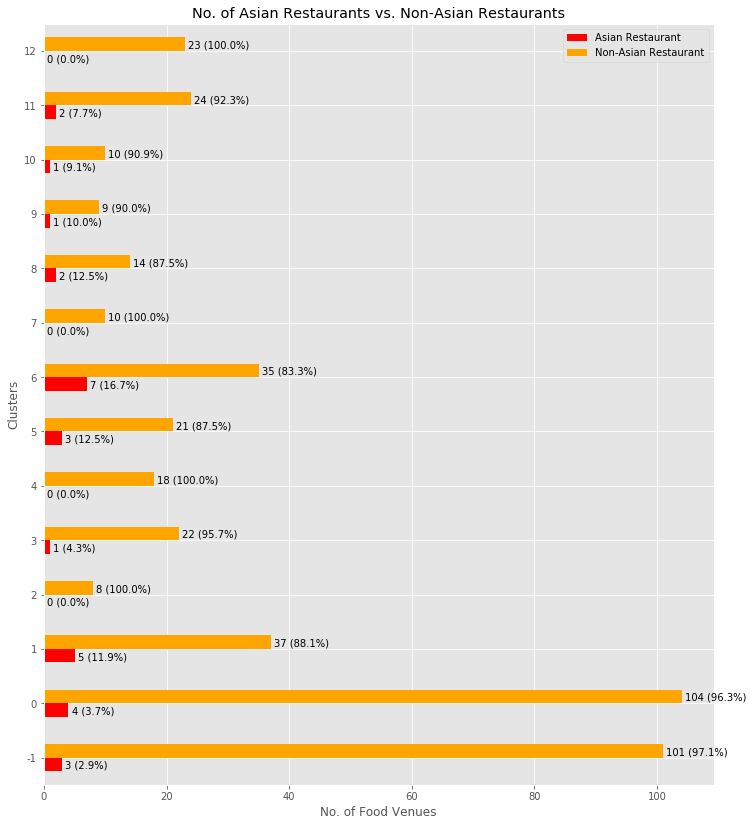

In [50]:
data_chart.plot(kind='barh', figsize=(12,14), color=['red', 'orange'])

plt.xlabel('No. of Food Venues')
plt.ylabel('Clusters')
plt.title('No. of Asian Restaurants vs. Non-Asian Restaurants')

for index, row in data_chart.iterrows():
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.text(row['Asian Restaurant'] + 0.5, index + 0.8, str(row['Asian Restaurant']) + ' (' + row['Asian Restaurant (%)'] + ')')
    plt.text(row['Non-Asian Restaurant'] + 0.5, index + 1.05, str(row['Non-Asian Restaurant']) + ' (' + row['Non-Asian Restaurant (%)'] + ')')

plt.show()

## Discussion

Based on the above analysis, one could find or prefer the following conclusions for "Which Charleston Area would it be recommended to open an Asian Restaurant?":

### A) Distant from all clusters

Some restaurant owners would prefer to open a new restaurant away from all Clusters.
On the above analysis, we identified 13 different Clusters which should be avoided in this case. Notice that 104 of 465 Food Venus are not located in a cluster, this more than 22% of all Food Venues. In other words, it is not uncommon for a restaurant in the Charleston area to be isolated or far away from a Cluster.

### B) In a cluster with Zero presence in Asian Restaurants

We were able to identify four Clusters without any Asian Cuisine presence.
* **No. 2** (James Island Area) and **No. 4** (Folly Beach Area) are fairly away from Downtown Charleston (avoiding the competition from that area). In addition to that, since these are clusters, a new owner could also take advantage of the cluster, since people/tourists would be already visiting the areas looking for Food Venues.
* **No. 12** (Walterboro) is another Cluster without any Asian Cuisine, but this area is very isolated to all other Charleston Areas. In this case, it would not take advantage of the tourism from the region. On the other hand, there is a whole population from this City/Area that are not close to any Asian Restaurants.
* Finally, **No. 7** (Cluster between North Charleston Area and Ladson Area) does not have any Asian Restaurants, but it is surrounded by other Areas with Asian Cuisine. If the objective is to find a cluster with zero presence of Asian Restaurants, this would not be a good choice.

### C) In a cluster close to multiple areas

Some entrepreneurs have high confidence on their product and, in this case, being located near to most areas would be a great choice. Regardless of the competition, the idea is to be in the middle of everything. <br>
For this case, two regions might be interesting:
* Cluster **No. 0** (Downton Charleston), this is the center/heart of Charleston. It is a highly populated area and it also attract a lot of tourist all year around. This Cluster is surrounded by other clusters and close by different areas such as James Island, West Asheley, North Charleston, Daniel Island and Mount Pleasant.
* In the North Charleston Area, this area is surrounded by different Cluster (5, 6, 7, 8 and 9) and very close to other areas such as Hanahan, Goose Greak, Ladson and Summerville. This is an area with a lot of growth and a lot of opportunities.

### D) A unexplored "sub-type" of Asian Cuisine

Surprisingly, the code along with the Foursquare API did not identify many different types of Asian Cuisine. This is a sign that there is not much variety of Asian Cuisine in the Charleston Area. On the other hand, perhaps a different API or different parameter could identify more Asians restaurants. <br> 
Either way, the analysis shown very little representation of Asian Cuisine. This show potential for exploring this kind of cuisine on the Charleston Areas. <br>
Some of the types of popular Asian food that were not identified are:
* Korean cuisine
* Singaporean cuisine
* Filipino cuisine

And although this was not parts of the scope of the project, we were also not able to identify, for example:
* Indian cuisine
* Arab cuisine
* Turkish cuisine

### Conclusion

With this Report/Project one can conclude that there is potential for opening an Asian Restaurant in the Charleston Area. 

There are multiple **Locations** that can be explored or avoided (depending on the business strategy), but overall the Asian Cuisine is not highly present in the Charleston Area (overall only ~6% of the restaurants are Asian). Furthermore, some "sub-types" are little to none present in the area (i.e. Korean Food), which is the biggest advantage that a new restaurant owner could explore.

On a personal note, opening a Korean Restaurant (known to be very popular in other cities/locations) in the North Charleston or Downtown Charleston area is a great opportunity. These two areas are highly populated and centered among most of the Charleston Areas. Moreover, Korean food can stand out among other asian cuisines for presenting a very different type of food (i.e. Korean Barbecue). Furthermore, the Korean Culture has been gaining popularity in the USA. 

Naturally, this is only one aspect of analysis that an investor would take in consideration. A lot of indicator were not approached such as: population/demographic target, infrastructure cost, staffing requirements, marketing/advertisement requirements, ... <br>
However, this is not the scope of this project. The only aspect that we are targeting is location.